In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing

In [4]:
df=pd.read_csv(r'C:\Users\lenovo\Downloads\Fraud.csv')

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [7]:
df['isFlaggedFraud'].unique()

array([0, 1], dtype=int64)

In [8]:
df['nameOrig'].value_counts()

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64

In [9]:
df['isFraud'].unique()

array([0, 1], dtype=int64)

In [10]:
df[df['isFlaggedFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [11]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().mean()*100

step              0.0
type              0.0
amount            0.0
nameOrig          0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest          0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
isFlaggedFraud    0.0
dtype: float64

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
df['type']=le.fit_transform(df['type'])
df['nameOrig']=le.fit_transform(df['nameOrig'])
df['nameDest']=le.fit_transform(df['nameDest'])

In [17]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


In [18]:
df['nameOrig'].value_counts()

nameOrig
2964663    3
4260723    3
4857429    3
5447168    3
2575378    3
          ..
6319574    1
5433113    1
1863502    1
5185095    1
919229     1
Name: count, Length: 6353307, dtype: int64

In [19]:
label=df['isFraud']

In [20]:
data= df.drop('isFraud',axis=1)

In [21]:
data.shape

(6362620, 10)

In [22]:
label.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [23]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0


<Axes: xlabel='type', ylabel='Density'>

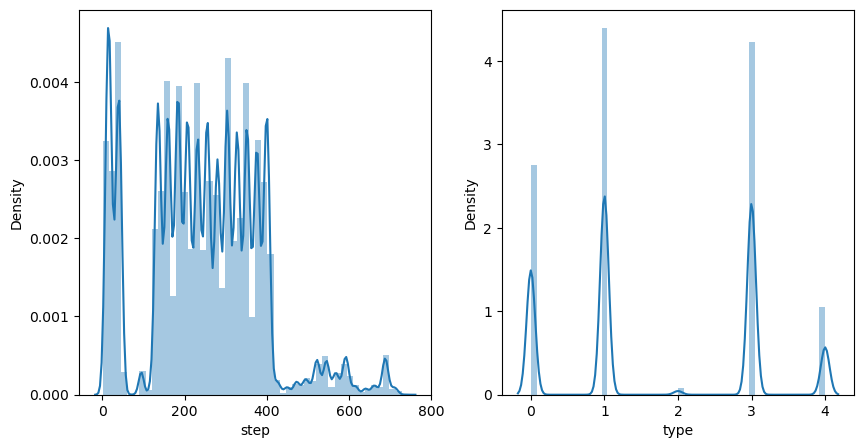

In [24]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(df['step'])

plt.subplot(1,2,2)
sns.distplot(df['type'])


In [25]:
data['step'].describe()

count    6.362620e+06
mean     2.433972e+02
std      1.423320e+02
min      1.000000e+00
25%      1.560000e+02
50%      2.390000e+02
75%      3.350000e+02
max      7.430000e+02
Name: step, dtype: float64

In [26]:
# Finding the boundary values of step column
print("Highest allowed",data['step'].mean() + 3*data['step'].std()) #anything above highest allowed is an outlier
print("Lowest allowed",data['step'].mean() - 3*data['step'].std()) #anything below lowest allowed is an outliera

Highest allowed 670.3931587789375
Lowest allowed -183.59866751590442


In [27]:
# Finding the outliers
data[(data['step'] > 670.3931587789375) | (data['step'] < -183.59866751590442)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
6296000,671,4,3544.76,5441228,3544.76,0.0,5090,0.00,0.00,0
6296001,671,1,3544.76,1970891,3544.76,0.0,532503,1149120.99,1152665.75,0
6296002,671,4,188731.21,1274296,188731.21,0.0,108397,0.00,0.00,0
6296003,671,1,188731.21,1500591,188731.21,0.0,81561,591154.11,779885.32,0
6296004,671,4,36956.27,6218176,36956.27,0.0,128246,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,5651847,339682.13,0.0,505863,0.00,339682.13,0
6362616,743,4,6311409.28,1737278,6311409.28,0.0,260949,0.00,0.00,0
6362617,743,1,6311409.28,533958,6311409.28,0.0,108224,68488.84,6379898.11,0
6362618,743,4,850002.52,2252932,850002.52,0.0,319713,0.00,0.00,0


In [28]:
upper_limit=data['step'].mean() + 3*data['step'].std()
lower_limit=data['step'].mean() - 3*data['step'].std()

In [29]:
#Capping

data['step'] = np.where(
    data['step']>upper_limit,
    upper_limit,
    np.where(
        data['step']<lower_limit,
        lower_limit,
        data['step']
    )
)

In [30]:
#Outliers Removed from step column
data[(data['step'] > 670.3931587789375) | (data['step'] < -183.59866751590442)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud


In [31]:
# Finding the boundary values of type column
print("Highest allowed",data['type'].mean() + 3*data['type'].std()) #anything above highest allowed is an outlier
print("Lowest allowed",data['type'].mean() - 3*data['type'].std()) #anything below lowest allowed is an outliera

Highest allowed 5.76449971324236
Lowest allowed -2.3361997361888824


In [32]:
# Finding the outliers
data[(data['type'] > 5.76449971324236) | (data['type'] < -2.3361997361888824)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud


<Axes: xlabel='nameOrig', ylabel='Density'>

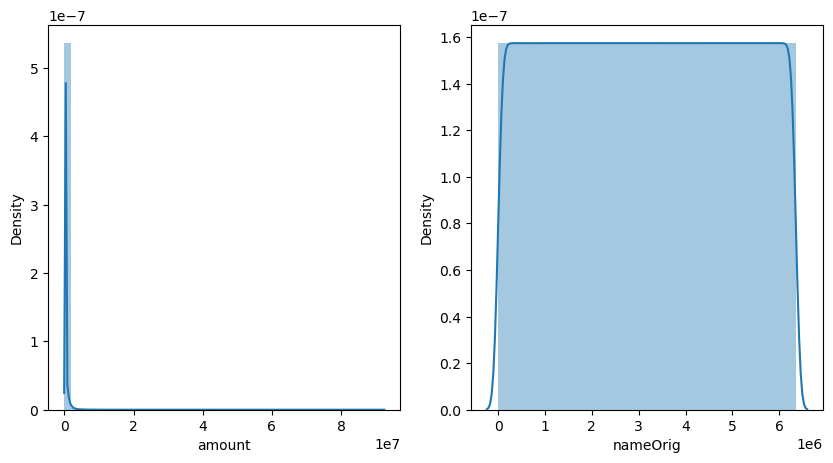

In [33]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(df['amount'])

plt.subplot(1,2,2)
sns.distplot(df['nameOrig'])


<Axes: xlabel='amount'>

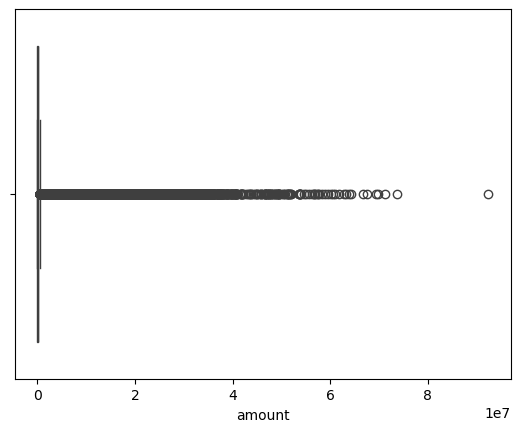

In [34]:
sns.boxplot(x=data['amount'])

In [35]:
# Finding the IQR
percentile25 = data['amount'].quantile(0.25)
percentile75 = data['amount'].quantile(0.75)

In [36]:
percentile25

13389.57

In [37]:
percentile75

208721.4775

In [38]:
iqr = percentile75 - percentile25

In [39]:
iqr

195331.9075

In [40]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [41]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 501719.33875
Lower limit -279608.29125


In [42]:
# Finding the outliers
data[(data['amount'] >  501719.33875) | (data['amount'] < -279608.29125)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
85,1.000000,4,1505626.01,6113295,0.00,0.0,472721,29031.00,5515763.34,0
86,1.000000,4,554026.99,1983067,0.00,0.0,502728,579285.56,0.00,0
88,1.000000,4,761507.39,4421346,0.00,0.0,174831,1280036.23,19169204.93,0
89,1.000000,4,1429051.47,1708442,0.00,0.0,174831,2041543.62,19169204.93,0
93,1.000000,4,583848.46,2756831,0.00,0.0,84652,667778.00,2107778.11,0
...,...,...,...,...,...,...,...,...,...,...
6362613,670.393159,1,1258818.82,1432154,1258818.82,0.0,71274,503464.50,1762283.33,0
6362616,670.393159,4,6311409.28,1737278,6311409.28,0.0,260949,0.00,0.00,0
6362617,670.393159,1,6311409.28,533958,6311409.28,0.0,108224,68488.84,6379898.11,0
6362618,670.393159,4,850002.52,2252932,850002.52,0.0,319713,0.00,0.00,0


In [43]:
#Capping

data['amount'] = np.where(
    data['amount']>upper_limit,
    upper_limit,
    np.where(
        data['amount']<lower_limit,
        lower_limit,
        data['amount']
    )
)

In [44]:
data[(data['amount'] >  501719.33875) | (data['amount'] < -279608.29125)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud


<Axes: xlabel='amount'>

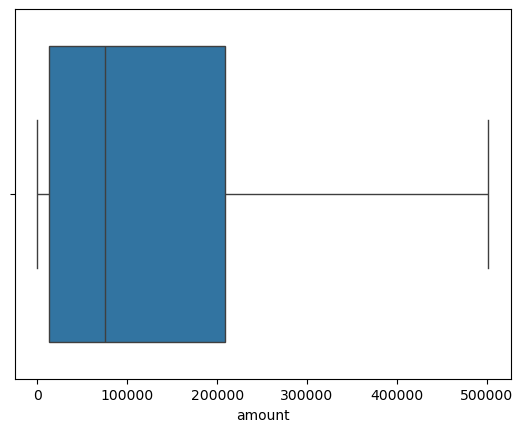

In [45]:
sns.boxplot(x=data['amount'])

<Axes: xlabel='nameOrig'>

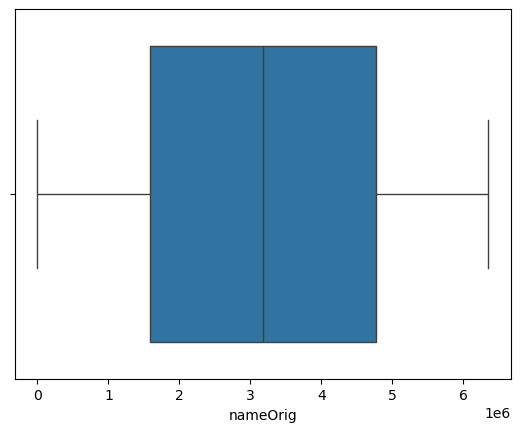

In [46]:
sns.boxplot(x=data['nameOrig'])

<Axes: xlabel='newbalanceOrig', ylabel='Density'>

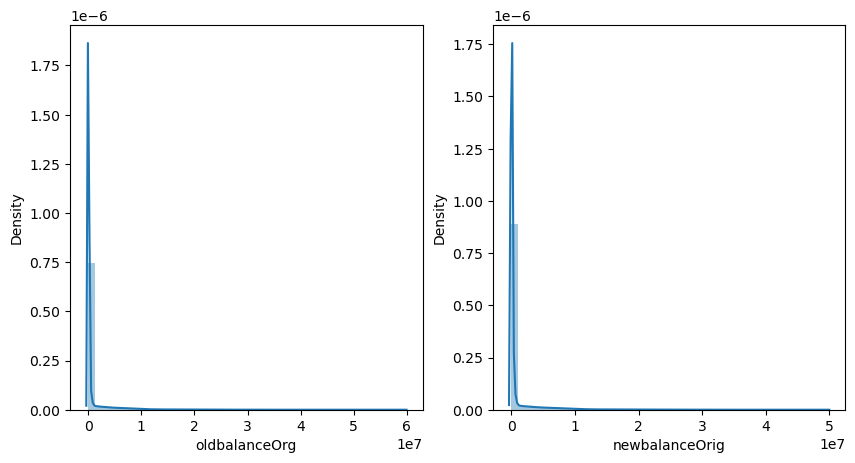

In [47]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(df['oldbalanceOrg'])

plt.subplot(1,2,2)
sns.distplot(df['newbalanceOrig'])


<Axes: xlabel='oldbalanceOrg'>

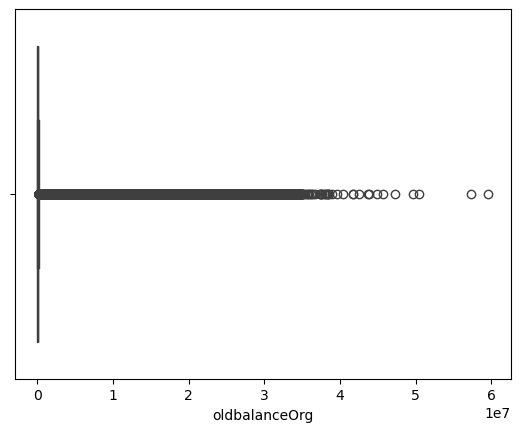

In [48]:
sns.boxplot(x=data['oldbalanceOrg'])

In [49]:
# Finding the IQR
percentile25 = data['oldbalanceOrg'].quantile(0.25)
percentile75 = data['oldbalanceOrg'].quantile(0.75)

In [50]:
iqr = percentile75 - percentile25

In [51]:
iqr

107315.175

In [52]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [53]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 268287.9375
Lower limit -160972.7625


In [54]:
# Finding the outliers
data[(data['oldbalanceOrg'] >  268287.9375) | (data['oldbalanceOrg'] < -160972.7625)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
14,1.000000,3,4098.78000,87083,503264.00,499165.22,1279605,0.00,0.00,0
37,1.000000,3,2791.42000,6101489,300481.00,297689.58,660929,0.00,0.00,0
38,1.000000,3,7413.54000,1546053,297689.58,290276.03,1046737,0.00,0.00,0
62,1.000000,2,8727.74000,2190286,882770.00,874042.26,38279,12636.00,0.00,0
63,1.000000,3,2599.46000,5978572,874042.26,871442.79,1529849,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,670.393159,1,339682.13000,5651847,339682.13,0.00,505863,0.00,339682.13,0
6362616,670.393159,4,501719.33875,1737278,6311409.28,0.00,260949,0.00,0.00,0
6362617,670.393159,1,501719.33875,533958,6311409.28,0.00,108224,68488.84,6379898.11,0
6362618,670.393159,4,501719.33875,2252932,850002.52,0.00,319713,0.00,0.00,0


In [55]:
#Capping

data['oldbalanceOrg'] = np.where(
    data['oldbalanceOrg']>upper_limit,
    upper_limit,
    np.where(
        data['oldbalanceOrg']<lower_limit,
        lower_limit,
        data['oldbalanceOrg']
    )
)

In [56]:
data[(data['oldbalanceOrg'] >  268287.9375) | (data['oldbalanceOrg'] < -160972.7625)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud


<Axes: xlabel='newbalanceOrig'>

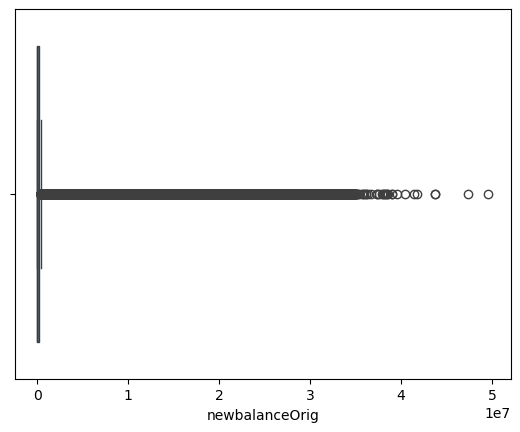

In [57]:
sns.boxplot(x=data['newbalanceOrig'])

In [58]:
# Finding the IQR
percentile25 = df['newbalanceOrig'].quantile(0.25)
percentile75 = df['newbalanceOrig'].quantile(0.75)

In [59]:
iqr = percentile75 - percentile25

In [60]:
iqr

144258.41

In [61]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [62]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 360646.025
Lower limit -216387.615


In [63]:
# Finding the outliers
data[(data['newbalanceOrig'] > 360646.025) | (data['newbalanceOrig'] < -216387.615)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
14,1.000000,3,4098.78000,87083,268287.9375,499165.22,1279605,0.0,0.0,0
62,1.000000,2,8727.74000,2190286,268287.9375,874042.26,38279,12636.0,0.0,0
63,1.000000,3,2599.46000,5978572,268287.9375,871442.79,1529849,0.0,0.0,0
241,1.000000,3,4635.18000,362725,268287.9375,6309146.87,857621,0.0,0.0,0
242,1.000000,3,1267.97000,175655,268287.9375,6307878.90,1120920,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
6362576,670.393159,4,501719.33875,5632760,268287.9375,35674547.89,421572,0.0,0.0,0
6362578,670.393159,4,501719.33875,366072,268287.9375,25674547.89,556973,0.0,0.0,0
6362580,670.393159,4,501719.33875,5986993,268287.9375,15674547.89,277944,0.0,0.0,0
6362582,670.393159,4,501719.33875,3106908,268287.9375,5674547.89,461035,0.0,0.0,0


In [64]:
#Capping

data['newbalanceOrig'] = np.where(
    data['newbalanceOrig']>upper_limit,
    upper_limit,
    np.where(
        data['newbalanceOrig']<lower_limit,
        lower_limit,
        data['newbalanceOrig']
    )
)

In [65]:
data[(data['newbalanceOrig'] > 360646.025) | (data['newbalanceOrig'] < -216387.615)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud


<Axes: xlabel='newbalanceOrig'>

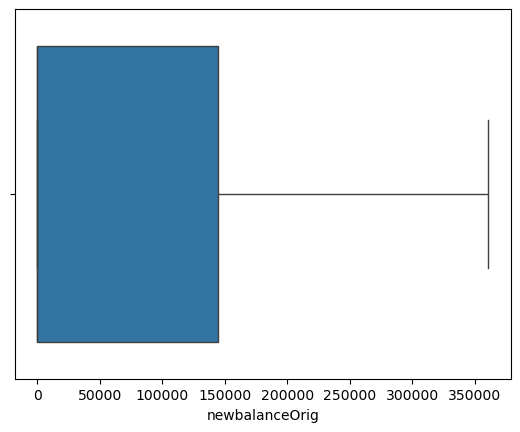

In [66]:
sns.boxplot(x=data['newbalanceOrig'])

<Axes: xlabel='oldbalanceDest', ylabel='Density'>

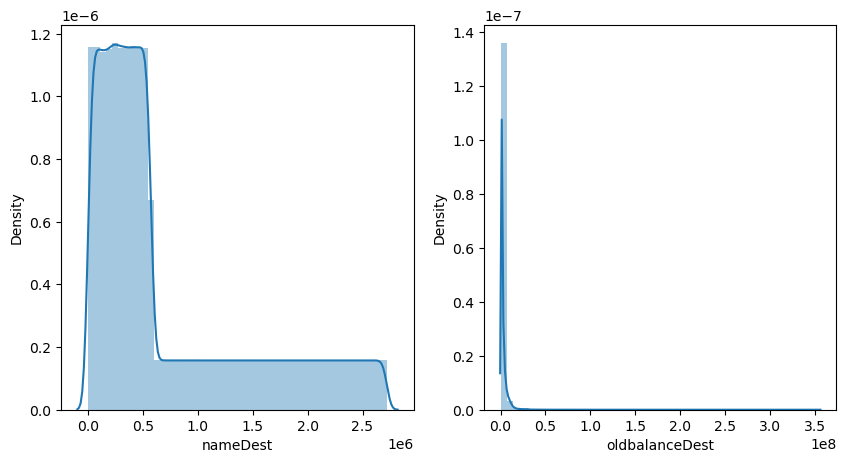

In [67]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(df['nameDest'])

plt.subplot(1,2,2)
sns.distplot(df['oldbalanceDest'])


<Axes: xlabel='nameDest'>

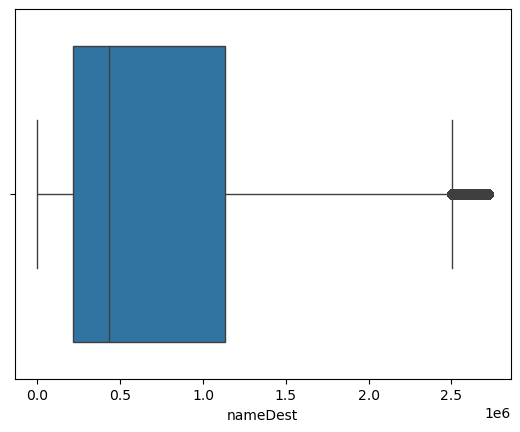

In [68]:
sns.boxplot(x=df['nameDest'])

In [69]:
# Finding the IQR
percentile25 = df['nameDest'].quantile(0.25)
percentile75 = df['nameDest'].quantile(0.75)

In [70]:
iqr = percentile75 - percentile25

In [71]:
iqr

915614.25

In [72]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [73]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 2505930.625
Lower limit -1156526.375


In [74]:
# Finding the outliers
data[(data['nameDest'] > 2505930.625) | (data['nameDest'] < -1156526.375)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
12,1.000000,3,2560.74,2129034,5070.0,2509.26,2692147,0.0,0.0,0
52,1.000000,3,2330.64,5752204,203543.0,201212.36,2620934,0.0,0.0,0
100,1.000000,3,871.75,10660,19869.0,18997.25,2711062,0.0,0.0,0
101,1.000000,3,1035.36,5718861,71636.0,70600.64,2613886,0.0,0.0,0
237,1.000000,3,3608.41,5154883,11150.0,7541.59,2615430,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
6362218,670.393159,3,2989.88,278508,27490.0,24500.12,2678858,0.0,0.0,0
6362237,670.393159,3,8034.53,2333927,33309.0,25274.47,2635510,0.0,0.0,0
6362244,670.393159,3,3346.02,378179,9.0,0.00,2537526,0.0,0.0,0
6362278,670.393159,3,9178.47,339134,258.0,0.00,2674771,0.0,0.0,0


In [75]:
#Capping

data['nameDest'] = np.where(
    data['nameDest']>upper_limit,
    upper_limit,
    np.where(
        data['nameDest']<lower_limit,
        lower_limit,
        data['nameDest']
    )
)

In [76]:
data[(data['nameDest'] > 2505930.625) | (data['nameDest'] < -1156526.375)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud


<Axes: xlabel='oldbalanceDest'>

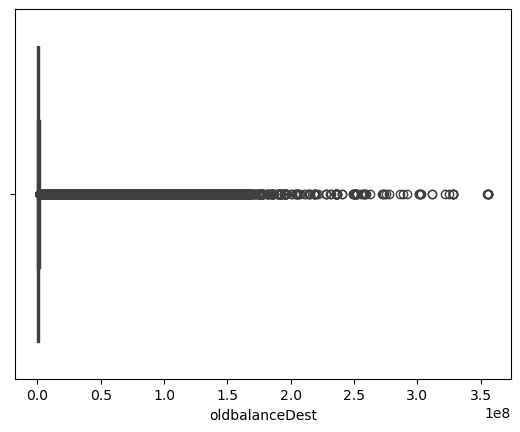

In [77]:
sns.boxplot(x=df['oldbalanceDest'])

In [78]:
# Finding the IQR
percentile25 = df['oldbalanceDest'].quantile(0.25)
percentile75 = df['oldbalanceDest'].quantile(0.75)

In [79]:
iqr = percentile75 - percentile25

In [80]:
iqr

943036.7075

In [81]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [82]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 2357591.76875
Lower limit -1414555.06125


In [83]:
# Finding the outliers
data[(data['oldbalanceDest'] > 2357591.76875) | (data['oldbalanceDest'] < -1414555.06125)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
94,1.000000,4,501719.33875,1627280,0.0000,0.0,174831.0,3470595.10,19169204.93,0
96,1.000000,4,501719.33875,5838793,0.0000,0.0,174831.0,5195482.15,19169204.93,0
113,1.000000,1,85423.63000,4579084,0.0000,0.0,174831.0,5776776.41,19169204.93,0
156,1.000000,1,186447.51000,6277570,0.0000,0.0,174831.0,5862200.03,19169204.93,0
171,1.000000,1,44443.08000,3953385,0.0000,0.0,174831.0,6048647.54,19169204.93,0
...,...,...,...,...,...,...,...,...,...,...
6362553,670.393159,1,297846.16000,4327983,268287.9375,0.0,222555.0,11436080.11,11733926.27,0
6362555,670.393159,1,106584.32000,3567918,106584.3200,0.0,296202.0,5524872.71,5631457.03,0
6362569,670.393159,1,194521.28000,1832760,194521.2800,0.0,568151.0,7203373.74,7397895.02,0
6362575,670.393159,1,501719.33875,2379680,268287.9375,0.0,341766.0,2930014.23,4685662.04,0


In [84]:
#Capping

data['oldbalanceDest'] = np.where(
    data['oldbalanceDest']>upper_limit,
    upper_limit,
    np.where(
        data['oldbalanceDest']<lower_limit,
        lower_limit,
        data['oldbalanceDest']
    )
)

In [85]:
data[(data['oldbalanceDest'] > 2357591.76875) | (data['oldbalanceDest'] < -1414555.06125)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud


<Axes: xlabel='isFlaggedFraud', ylabel='Density'>

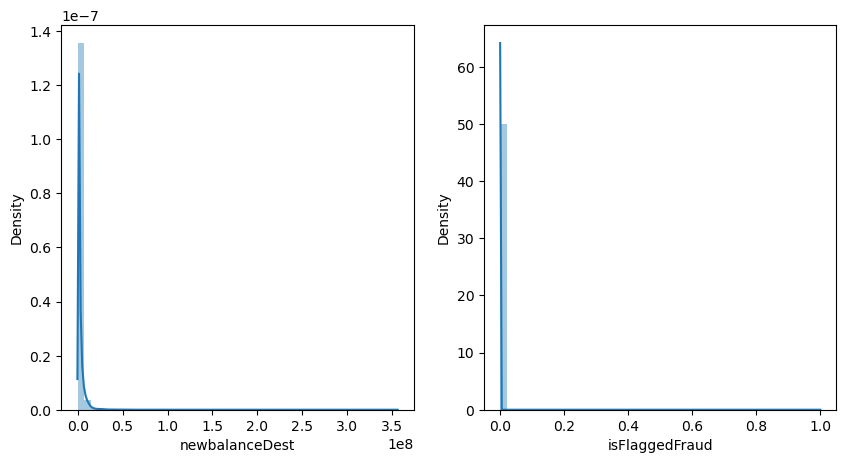

In [86]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(df['newbalanceDest'])

plt.subplot(1,2,2)
sns.distplot(df['isFlaggedFraud'])


<Axes: xlabel='newbalanceDest'>

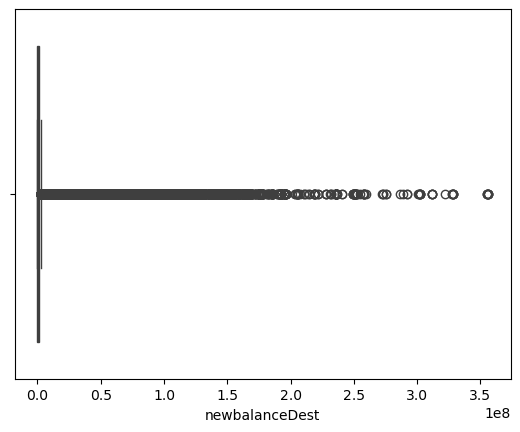

In [87]:
sns.boxplot(x=df['newbalanceDest'])

In [88]:
# Finding the IQR
percentile25 = df['newbalanceDest'].quantile(0.25)
percentile75 = df['newbalanceDest'].quantile(0.75)

In [89]:
iqr = percentile75 - percentile25

In [90]:
iqr

1111909.25

In [91]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [92]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 2779773.125
Lower limit -1667863.875


In [93]:
# Finding the outliers
data[(data['newbalanceDest'] > 2779773.125) | (data['newbalanceDest'] < -1667863.875)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
48,1.000000,1,5346.89000,4749571,0.0000,0.0,349730.0,6.526370e+05,6453430.91,0
83,1.000000,4,125872.53000,1457906,0.0000,0.0,392423.0,3.485120e+05,3420103.09,0
84,1.000000,4,379856.23000,1477099,0.0000,0.0,174831.0,9.001800e+05,19169204.93,0
85,1.000000,4,501719.33875,6113295,0.0000,0.0,472721.0,2.903100e+04,5515763.34,0
88,1.000000,4,501719.33875,4421346,0.0000,0.0,174831.0,1.280036e+06,19169204.93,0
...,...,...,...,...,...,...,...,...,...,...
6362581,670.393159,1,501719.33875,5292744,268287.9375,0.0,256366.0,0.000000e+00,10000000.00,0
6362583,670.393159,1,501719.33875,2193920,268287.9375,0.0,74217.0,1.929130e+05,10192912.98,0
6362599,670.393159,1,501719.33875,3190079,268287.9375,0.0,464383.0,1.229762e+06,5238820.34,0
6362617,670.393159,1,501719.33875,533958,268287.9375,0.0,108224.0,6.848884e+04,6379898.11,0


In [94]:
#Capping

data['newbalanceDest'] = np.where(
    data['newbalanceDest']>upper_limit,
    upper_limit,
    np.where(
        data['newbalanceDest']<lower_limit,
        lower_limit,
        data['newbalanceDest']
    )
)

In [95]:
data[(data['newbalanceDest'] > 2779773.125) | (data['newbalanceDest'] < -1667863.875)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud


<Axes: xlabel='isFlaggedFraud'>

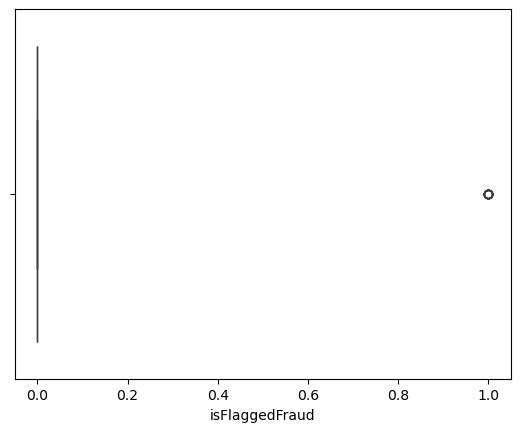

In [96]:
sns.boxplot(x=df['isFlaggedFraud'])

In [97]:
# Finding the IQR
percentile25 = df['isFlaggedFraud'].quantile(0.25)
percentile75 = df['isFlaggedFraud'].quantile(0.75)

In [98]:
iqr = percentile75 - percentile25

In [99]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [100]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 0.0
Lower limit 0.0


In [101]:
#Finding the outliers
data[(data['isFlaggedFraud'] > 0) | (data['isFlaggedFraud'] < 0)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
2736446,212.000000,4,501719.33875,5462026,268287.9375,360646.025,465112.0,0.0,0.0,1
3247297,250.000000,4,501719.33875,329539,268287.9375,360646.025,43638.0,0.0,0.0,1
3760288,279.000000,4,501719.33875,116746,268287.9375,360646.025,29788.0,0.0,0.0,1
5563713,387.000000,4,501719.33875,6052892,268287.9375,360646.025,540034.0,0.0,0.0,1
5996407,425.000000,4,501719.33875,5332564,268287.9375,360646.025,116289.0,0.0,0.0,1
5996409,425.000000,4,501719.33875,4552191,268287.9375,360646.025,32302.0,0.0,0.0,1
6168499,554.000000,4,501719.33875,3078566,268287.9375,360646.025,419584.0,0.0,0.0,1
6205439,586.000000,4,353874.22000,2248279,268287.9375,353874.220,227867.0,0.0,0.0,1
6266413,617.000000,4,501719.33875,5651751,268287.9375,360646.025,471714.0,0.0,0.0,1
6281482,646.000000,4,501719.33875,2958273,268287.9375,360646.025,238527.0,0.0,0.0,1


In [102]:
#Capping

data['isFlaggedFraud'] = np.where(
    data['isFlaggedFraud']>upper_limit,
    upper_limit,
    np.where(
        data['isFlaggedFraud']<lower_limit,
        lower_limit,
        data['isFlaggedFraud']
    )
)

Outliers removed from 'isFlaggedFraud' col

In [104]:
data[(data['isFlaggedFraud'] > 0) | (data['isFlaggedFraud'] < 0)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud


In [105]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1.0,3,9839.64,757869,170136.0,160296.36,1662094.0,0.0,0.0,0.0
1,1.0,3,1864.28,2188998,21249.0,19384.72,1733924.0,0.0,0.0,0.0
2,1.0,4,181.00,1002156,181.0,0.00,439685.0,0.0,0.0,0.0
3,1.0,1,181.00,5828262,181.0,0.00,391696.0,21182.0,0.0,0.0
4,1.0,3,11668.14,3445981,41554.0,29885.86,828919.0,0.0,0.0,0.0


In [106]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

data=scaler.fit_transform(data)

## Train Test Split

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
train_X,test_X,train_Y,test_Y=train_test_split(data,label,test_size=0.25,random_state=7)

## ANN MODEL FOR PREDICTION

In [111]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [112]:
model=Sequential()

model.add(Dense(64,activation='relu',input_dim=10))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [113]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

In [114]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [115]:
history=model.fit(train_X,train_Y,batch_size=32,epochs=10,validation_data=(test_X,test_Y))

Epoch 1/10
149124/149124 ━━━━━━━━━━━━━━━━━━━━ 158s 1ms/step - accuracy: 0.9991 - loss: 0.0046 - val_accuracy: 0.9995 - val_loss: 0.0024
Epoch 2/10
149124/149124 ━━━━━━━━━━━━━━━━━━━━ 149s 999us/step - accuracy: 0.9994 - loss: 0.0025 - val_accuracy: 0.9995 - val_loss: 0.0026
Epoch 3/10
149124/149124 ━━━━━━━━━━━━━━━━━━━━ 161s 1ms/step - accuracy: 0.9994 - loss: 0.0023 - val_accuracy: 0.9995 - val_loss: 0.0023
Epoch 4/10
149124/149124 ━━━━━━━━━━━━━━━━━━━━ 148s 991us/step - accuracy: 0.9994 - loss: 0.0022 - val_accuracy: 0.9995 - val_loss: 0.0020
Epoch 5/10
149124/149124 ━━━━━━━━━━━━━━━━━━━━ 153s 1ms/step - accuracy: 0.9994 - loss: 0.0022 - val_accuracy: 0.9995 - val_loss: 0.0021
Epoch 6/10
149124/149124 ━━━━━━━━━━━━━━━━━━━━ 148s 989us/step - accuracy: 0.9994 - loss: 0.0023 - val_accuracy: 0.9993 - val_loss: 0.0026
Epoch 7/10
149124/149124 ━━━━━━━━━━━━━━━━━━━━ 151s 1ms/step - accuracy: 0.9995 - loss: 0.0023 - val_accuracy: 0.9995 - val_loss: 0.0021
Epoch 8/10
149124/149124 ━━━━━━━━━━━━━━━━━

## Graphical Accuracy & Loss Evaluation

[]

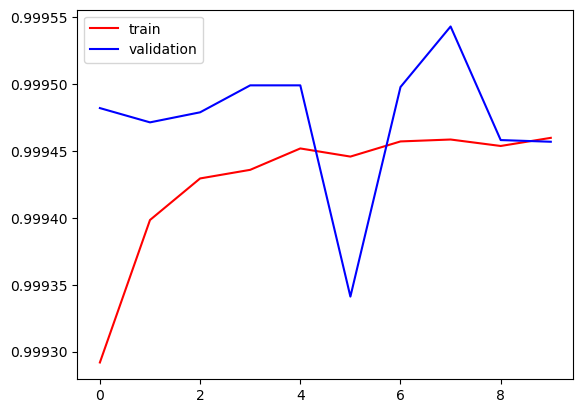

In [117]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.plot()

[]

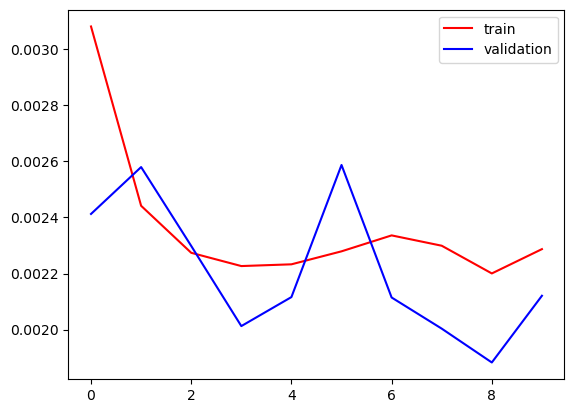

In [118]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.plot()

## Performance Evaluation

In [120]:
model.evaluate(test_X,test_Y)

49708/49708 ━━━━━━━━━━━━━━━━━━━━ 30s 605us/step - accuracy: 0.9995 - loss: 0.0021


[0.00212068110704422, 0.9994568228721619]

In [232]:
predictions=model.predict(test_X)
predictions = (predictions > 0.5).astype(int)  # Threshold at 0.5 to convert probabilities to binary

49708/49708 ━━━━━━━━━━━━━━━━━━━━ 31s 619us/step


##  Evaluation Metrics

In [233]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

In [244]:
precision = precision_score(test_Y, predictions)
recall = recall_score(test_Y, predictions)
f1 = f1_score(test_Y, predictions)

print(f"Precision of the model is: {precision}")
print(f"Recall of the model is: {recall}")
print(f"F1-Score of the model is: {f1}")

Precision of the model is: 0.8168456755228943
Recall of the model is: 0.7279596977329975
F1-Score of the model is: 0.7698454981353223


## Description Of Fraud Detection Model
1. Dataset Preparation:
The dataset used for fraud detection is large and consists of 6,362,620 rows and 10 columns. The target variable indicates whether a transaction is fraudulent or not. Several preprocessing steps were applied to the data, including:

Feature selection: Selecting relevant features that may be indicative of fraudulent activity.
Normalization: Scaling the features to ensure they are all on a similar scale, which is important for models like neural networks.

2. Model Architecture:
The model is an Artificial Neural Network (ANN), designed with multiple dense layers. It uses TensorFlow/Keras to build the architecture. The key points of the architecture include:

Dense layers to capture complex patterns in the data.
A sigmoid activation function in the final layer, making it suitable for binary classification (fraud or non-fraud).
The ANN design ensures that the model can learn non-linear relationships between the features.

3. Training the Model:
Training is performed on the large dataset, allowing the model to distinguish between fraudulent and non-fraudulent transactions. The key components of the training process include:

Binary cross-entropy loss: This is a standard loss function for binary classification problems.
Adam optimizer: This adaptive optimizer is used to adjust the model weights based on the gradient during backpropagation.
The training process is evaluated based on accuracy and validation accuracy, ensuring that the model generalizes well to unseen data.

4. Performance Evaluation:
The model achieves strong results on the test set:

Accuracy: 99.95%
Loss: 0.0021 These values indicate that the model performs well in detecting fraudulent transactions. Predictions are generated on the test data, allowing for further analysis of model performance.

5. Evaluation Metrics:
Accuracy: Measures the percentage of correct predictions.
Precision: Measures the proportion of correctly predicted frauds out of all predicted frauds, indicating how accurate the model's fraud predictions are.
F1-score: It is the harmonic mean of precision and recall, providing a balanced measure that accounts for both false positives and false negatives.
Validation loss: Helps track overfitting and underfitting. Plots of training and validation metrics over time show the convergence of the model and allow for identification of potential overfitting.

7. Predictions:
The model makes predictions on the test data, which are thresholded at a value of 0.5 to classify transactions as either fraudulent or non-fraudulent. These predictions are then compared to the true labels to assess the model’s performance.

8. Model Performance Insights:
With an accuracy of around 99.95%, the model is highly effective in classifying transactions. However, due to the imbalanced nature of fraud detection (few frauds vs. many non-fraudulent transactions), additional metrics like precision, recall, and F1-score should be used to better evaluate the handling of:

False positives: Non-fraudulent transactions classified as fraud.
False negatives: Fraudulent transactions classified as non-fraudulent. Adding these metrics would provide a more comprehensive understanding of the model’s strengths and weaknesses.

## How did you select variables to be included in the model?
In fraud detection, variable selection is key. Variables are often selected based on domain knowledge, statistical analysis, and feature engineering techniques. Commonly used variables in fraud detection models include:

Transaction amount
Frequency of transactions
Time of transaction 
Location (if the transaction occurred from a new or unusual location)
Device/browser used for the transaction
Historical behavior patterns
Correlation analysis, feature importance metrics (from models like Random Forest), and automated methods like Recursive Feature Elimination (RFE) are also employed.

##  Demonstrate the performance of the model by using best set of tools.
Accuracy: Measures the overall correctness of the model.

Precision: Measures how many of the predicted frauds are actually fraudulent.

Recall: Measures how many actual frauds were correctly predicted.

F1-Score: Balances precision and recall for imbalanced datasets like fraud detection.

## What are the key factors that predict fraudulent customer?
Key factors that predict fraudulent customer behavior typically include:

1.Transaction Amount: Extremely high or unusually low transaction amounts may signal fraud.

2.Transaction Frequency: A sudden spike in the number of transactions or an abnormal rate of transactions can be indicative of fraud.

3.Location: Transactions made from unusual or geographically distant locations compared to the customer’s usual location can be suspicious.

4.Time of Transaction: Transactions at odd times (e.g., late at night or outside business hours) can indicate fraud.

5.Device Information: Transactions made from new or unknown devices compared to the customer’s usual pattern.

6.Payment Method: Use of uncommon payment methods, multiple credit cards, or frequent switching between cards may suggest fraudulent activity.

7.Account Age: Newer accounts may be more prone to fraud, especially if they exhibit suspicious behavior soon after creation.

8.Transaction Type: Certain types of transactions, such as cash withdrawals or large transfers, might be more closely associated with fraud.

9.IP Address & Device Fingerprinting: Multiple transactions from different IPs or devices within a short period may indicate fraud.

10.Past Fraud History: Customers or accounts with a history of fraudulent behavior are more likely to engage in fraud again.

## Do these factors make sense?
Yes, these factors make sense because they are based on observable behavioral patterns that differ between legitimate users and fraudsters. Fraudsters often test systems with smaller transactions before moving to larger frauds, use multiple devices, or perform transactions at unusual hours. These anomalies can be detected through data analysis.
However, it's also important to avoid excessive reliance on a single factor, as legitimate customers might occasionally exhibit behaviors that resemble fraudulent activity

## What kind of prevention should be adopted while company update its infrastructure?
Real-time monitoring should be implemented to catch suspicious transactions as they occur.
Encryption for sensitive customer data and secure protocols (such as HTTPS) should be enforced.
Multi-factor authentication (MFA) adds an extra layer of security for logins and transactions.
Machine learning pipelines should be maintained and updated frequently with new fraud patterns and emerging threats.
Regular audits of the fraud detection system ensure that updates haven’t introduced vulnerabilities.

## Assuming these actions have been implemented, how would you determine if they work?
To determine if fraud prevention actions are effective, you can monitor key metrics over time:

Reduction in fraud rates: Track the percentage of fraudulent transactions over time.
False positive rate: Ensure that legitimate transactions aren’t incorrectly flagged as fraud.
Customer complaints: Fewer customer complaints about blocked transactions might indicate that fraud detection is well-tuned.
Model performance metrics: Regularly check model precision, recall, and AUC-ROC to ensure the model is still accurately predicting fraud.
Cost savings: A decrease in losses due to fraud would indicate that prevention mechanisms are working.